In [12]:
from mapper_clusterer import *
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import pickle

In [2]:
from geography_helper import import_GA_boundary_file, places_to_geom
import geopandas as gpd
GA = import_GA_boundary_file('GAboundary.txt')
GApd = gpd.GeoDataFrame(data = pd.DataFrame({'state':['GA']}), geometry = [GA])

In [4]:
pca_features = pd.read_csv('pca_features.csv', index_col = 0)
coords = pca_features[['latitude', 'longitude']].values
X = pca_features.drop(['latitude', 'longitude'], axis = 1)
X_5 = X.iloc[:,:5]

# GMM, 1 local component

In [13]:
# GMM_1 = ClusterOverCoords(X_5, coords, GaussianMixture(n_components = 1))

In [14]:
# GMM_1.generate_clusters()

100%|██████████████████████████████████████████████| 13086/13086 [00:23<00:00, 565.47it/s]


In [15]:
# with open('GMM_1.pickle', 'wb') as f:
#     pickle.dump(GMM_1, f)

In [17]:
with open('GMM_1.pickle', 'rb') as f:
    GMM_1 = pickle.load(f)

In [18]:
print(f'Total clusters: {np.unique(GMM_1.components).shape[0]}')

Total clusters: 250


In [19]:
cluster_sizes = GMM_1.get_cluster_sizes()
cluster_sizes

,cluster_label,n_members
0,0,12628
1,4,28
2,60,19
3,2,15
4,49,15
...,...,...
245,14,1
246,111,1
247,112,1
248,113,1


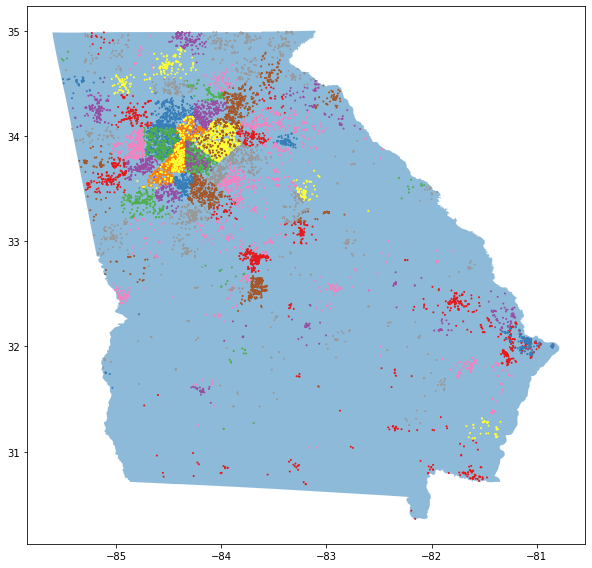

In [20]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,10))
GApd.plot(ax = ax, alpha = .5)
GMM_1.plot_cluster_map(markersize = 1, cmap = 'Set1', ax = ax, fig = fig)

In [21]:
labeled_data = GMM_1.data_with_labels()

(30.0, 35.5)

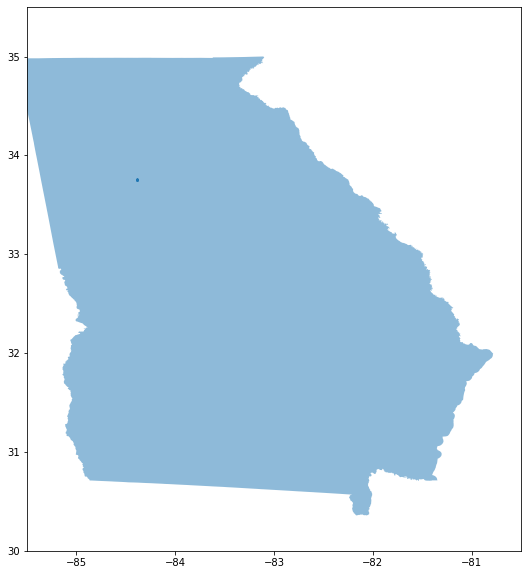

In [28]:
nth_largest = 5

fig, ax = plt.subplots(figsize = (10,10))
GApd.plot(ax = ax, alpha = .5)
places_to_geom(labeled_data[labeled_data['cluster'] 
                                  == cluster_sizes.iloc[nth_largest, 0]]).plot(ax = ax, markersize = 1)

plt.xlim(-85.5,-80.5)
plt.ylim(30,35.5)

Using one local class is similar to AC; large typical class with lots of smaller classes for outliers.

# GMM 5 components

In [30]:
GMM_5 = ClusterOverCoords(X_5, coords, GaussianMixture(n_components = 5))

In [31]:
GMM_5.generate_clusters()

ValueError: Expected n_samples >= n_components but got n_components = 5, n_samples = 2

In [ ]:
with open('GMM_5.pickle', 'wb') as f:
    pickle.dump(GMM_5, f)

In [17]:
# with open('GMM_5.pickle', 'rb') as f:
#     GMM_5 = pickle.load(f)

In [18]:
print(f'Total clusters: {np.unique(GMM_5.components).shape[0]}')

Total clusters: 250


In [19]:
cluster_sizes = GMM_5.get_cluster_sizes()
cluster_sizes

,cluster_label,n_members
0,0,12628
1,4,28
2,60,19
3,2,15
4,49,15
...,...,...
245,14,1
246,111,1
247,112,1
248,113,1


In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,10))
GApd.plot(ax = ax, alpha = .5)
GMM_5.plot_cluster_map(markersize = 1, cmap = 'Set1', ax = ax, fig = fig)